<a href="https://colab.research.google.com/github/ms2288/ds-section2-sprint1/blob/main/n211-simple-regression/n211a-simple-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

# Linear Regression

이번 모듈에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다. 이 데이터셋은 미국 시애틀 King County 지역에서 2014년 5월부터 ~ 2015년 5월 까지 주택 판매 가격 데이터입니다.

   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)


이 데이터를 사용해 다음 과제를 마크다운과 코드를 사용해 진행해 주세요.

In [2]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### 1) 특성들과 타겟(Price)과의 상관계수를 계산하고 가장 상관관계가 높은 특성을 찾아 타겟과의 관계를 시각화 하세요.
- **타겟과 상관관계가 가장 높은 특성의 이름을 과제 제출폼에 제출하세요.**

In [3]:
import numpy as np

In [8]:
# 예시 : 방 개수, 주택 넓이, 층 수, 주택의 상태, 등급을 중요한 컬럼으로 생각해 보자.
df_train = df[["bedrooms", "sqft_living", "floors", "grade", "price"]]

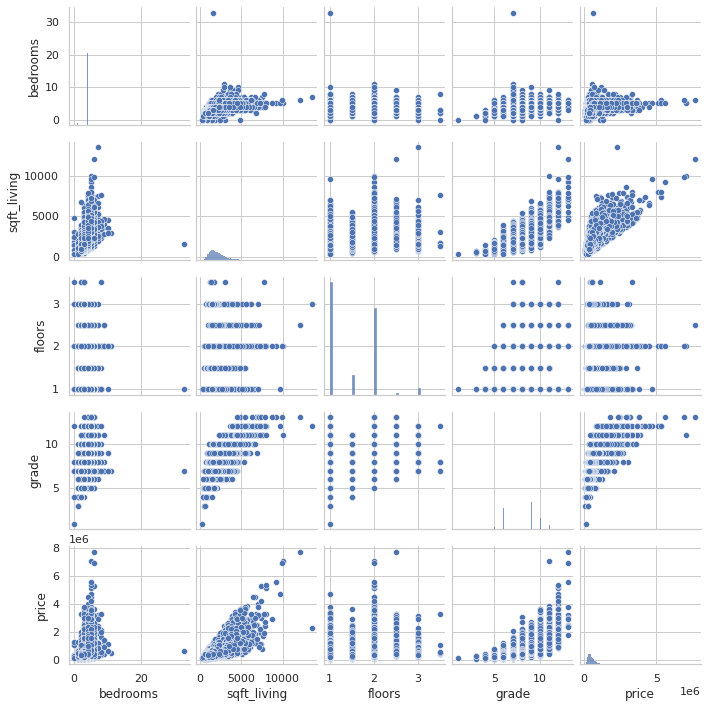

In [7]:
# 시각화로 파악하기
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
cols = ["bedrooms", "sqft_living", "floors", "grade", "price"]#중요한 칼럼 추출
sns.pairplot(df[cols], height=2);

In [9]:
# 상관계수 확인
df_train.corr()

,bedrooms,sqft_living,floors,grade,price
bedrooms,1.000000,0.576671,0.175429,0.356967,0.308350
sqft_living,0.576671,1.000000,0.353949,0.762704,0.702035
floors,0.175429,0.353949,1.000000,0.458183,0.256794
grade,0.356967,0.762704,0.458183,1.000000,0.667434
price,0.308350,0.702035,0.256794,0.667434,1.000000


In [11]:
corr=df.corr(method='pearson')#상관관계 계산
corr=corr['price']
corr=pd.DataFrame(corr)
corr=corr.drop(['price'],axis=0)#price열 제거
corr.loc[corr.idxmax()]#열값중에서 최대값인 행 가져오기
answer='sqft_living'
print("최대값 행 이름 : {0}, 최대값 : {1}".format(answer,corr.max()))

최대값 행 이름 : sqft_living, 최대값 : price    0.702035
dtype: float64


* 타겟값인 price와 상관관계가 가장 높은 특성은 sqt_living으로 상관계수는 0.702035을 가진다


### 2) grade 와 price의 scatter plot을 그리고 기준모델을 시각화 해 보세요.
- **기준모델의 값을 과제 제출폼에 제출하세요.**

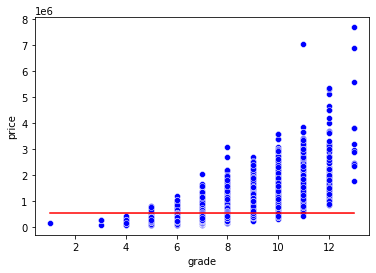

In [5]:
import seaborn as sns
x = df['grade']
y = df['price']

predict = df['price'].mean()
errors = predict - df['price']
mean_absolute_error = errors.abs().mean()

sns.lineplot(x=x, y=predict, color='red')
sns.scatterplot(x=x, y=y, color='blue');

In [6]:
predict

540088.1417665294

### 3) Scikit-Learn 라이브러리를 사용해 특성 grade에 대한 선형회귀모델을 만들어 보세요.
- **grade 값이 6인 경우에 모델이 예측하는 주택 가격을 과제 제출폼에 제출하세요.**

* 회기모델 라이브러리 불러오기

In [12]:
from sklearn.linear_model import LinearRegression

* 예측모델 인스턴스를 만듭니다

In [13]:
model = LinearRegression()

* X 특성들의 테이블과, y 타겟 벡터를 만듭니다

In [15]:
feature = ['grade']
target = ['price']
X_train = df[feature]
y_train = df[target]

* 모델을 학습(fit)합니다

In [16]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* 학습되어 얻은 회귀모델을 바탕으로 예측한 결과 grade가 6일때 prices는 194700.3977405입니다.

In [18]:
X_test = [[6]]
print("주택 등급 : ", X_test[0][0], "  가격 예측 : ", model.predict(X_test)[0][0], "$")

주택 등급 :  6   가격 예측 :  194700.3977405005 $


### 4) 만든 모델을 사용해 새로운 데이터에 대해 예측을 해 보고 coefficient를 사용해 설명해 보세요.
- **grade 특성에 대한 회귀계수를 과제 제출폼에 제출하세요.**

In [20]:
# 다른 grade값에 따른 주택가격 예측하기 1
grade = 7
X_test = [[grade]]
y_pred = model.predict(X_test)

print("주택 등급 : ", grade, "  가격 예측 : ", y_pred[0][0], "$")

주택 등급 :  7   가격 예측 :  403157.9601988797 $


In [21]:
# 다른 grade값에 따른 주택가격 예측하기 2
grade = 5
X_test = [[grade]]
y_pred = model.predict(X_test)

print("주택 등급 : ", grade, "  가격 예측 : ", y_pred[0][0], "$")

주택 등급 :  5   가격 예측 :  -13757.164717878448 $


In [27]:
#grade가 1 상승시 주택 가격은 208,457.562$ 상승한다
print('grade와 price 상관계수 확인 : ',model.coef_)

grade와 price 상관계수 확인 :  [[208457.56245838]]


### 5) sqft_living 특성을 사용하여 모델을 만들어 보고 두 모델을 비교해 보세요.
- **sqft_living에 대한 회귀계수를 과제 제출폼에 제출하세요.**

In [28]:
#학습시킬 데이터
feature = ['sqft_living']
target = ['price']
X_train = df[feature]
y_train = df[target]
#예측모델 인스턴스 생성
model2 = LinearRegression()
## 모델을 학습(fit)합니다
model2.fit(X_train, y_train)
#회귀 계수 확인
print('grade와 price간 상관계수 : {0}\nsqft_living간 price간 상관계수 : {1}'.format(model.coef_,model2.coef_))

grade와 price간 상관계수 : [[208457.56245838]]
sqft_living간 price간 상관계수 : [[280.6235679]]


## 🔥도전과제

### 6) 단순선형회귀모델을 만들기 위한 좋은 특성을 선택하기 위해 고려해야 하는 사항들에 대해 조사하고 서술하세요.

### 7) OLS에 대해서 검색해 보고 본인의 이해를 녹여내어 10문장 내로 요약해 보세요.

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###